In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra
sE, sI, rE, rI, Y  = -50..50, -50..50,  -50..50, -50..50, -50..50
box = sE × sI × rE × rI × Y
using CairoMakie

include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


TM6_glial_ECM_help (generic function with 1 method)

In [15]:
function model_braint_rhythms(u, p, t)

    sE, sI, rE, rI, Y = u
    τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, gammaY, ythr, sEthr, kY = p

    g(Y) = 1 + gammaY / (1 + exp(-Y + ythr))
    HevY(sE) = 1/(1 + exp(-(sE - sEthr)/kY))

    dsEdt = (1/τsE) *(-sE + γE*rE*(1-sE)*g(Y) + s0E)
    dsIdt = (1/τsI) *(-sI + γI*rI*(1-sI) + s0I)

    drEdt = (1/ τrE) *(-rE + 1/(1 + exp(-kE*((IE + wEE*sE-wIE*sI) -  θE))))
    drIdt = (1/τrI) *(-rI + 1/(1 + exp(-kI*((II + wEI*sE-wII*sI) - θI))))
    
    dYdt = -Y / τY + βY * HevY(sE)
    
    return SVector(dsEdt, dsIdt, drEdt, drIdt, dYdt)
end

model_braint_rhythms (generic function with 1 method)

In [18]:
function show_fp(fp, names)
    for (index, fp_) in enumerate(fp)
        println("$(index) - fp:")
        for (i, cord) in enumerate(fp_)
                println("$(names[i]): $cord")
        end
    end
end
function show_eigenvalues(ei)
    for (index, ei_) in enumerate(ei)
        println("$(index) - fp:")
        for (i, ei__) in enumerate(ei_)
            println("$ei__")
        end
    end
end
names = ["sE", "sI", "rE", "rI", "Y"];

τsE = 3.0; γE = 4.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = 0.1;

τrE = 2.0; kE = 5.0; IE = 0.9; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.0; wEI = 5.0; wII = 3.0; θI = 0.4;

τY = 0.01;  βY = 0.01;
ythr = 0.5; sEthr = 0.5; kY = 0.01

0.01

In [7]:
time = 1000.0; tt = 250.0; tstep = 0.001; times = [time, tt]
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [42]:
γY = 110.0
p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, 0.9, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];
u0 = [0.0, 0.0, 0.0, 0.0, 0.0]

ds = CoupledODEs(model_braint_rhythms, u0, p, diffeq = integ_set)
traj, trange = trajectory(ds, time, Δt = tstep, Ttr = 0.0)

(5-dimensional StateSpaceSet{Float64} with 1000001 points, 0.0:0.001:1000.0)

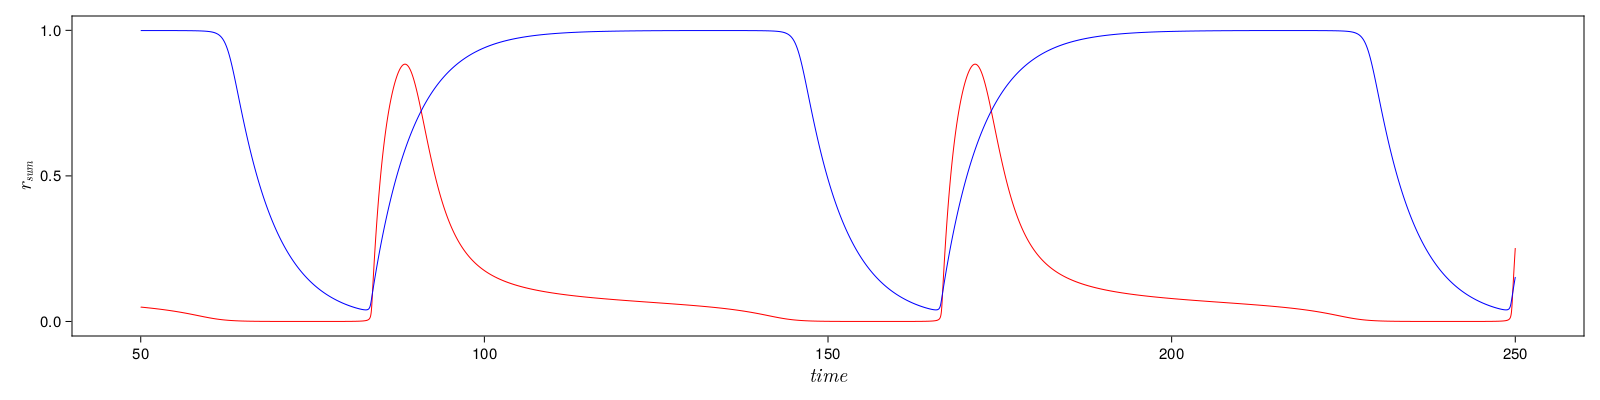

CairoMakie.Screen{IMAGE}


In [43]:
tstart, tend = 50000, 250000
tickssize = 15
labelsize = 20

CairoMakie.activate!()
f= Figure(resolution = (1600, 400))
axis  = Axis(f[1, 1], xlabel = L"time", ylabel = L"r_{sum}", xlabelsize = labelsize, ylabelsize = labelsize, xticklabelsize = tickssize, yticklabelsize = tickssize, xgridvisible = false, ygridvisible = false)

lines!(axis, trange[tstart:tend], traj[tstart:tend, 3], linewidth = 1.0, color = :red)
lines!(axis, trange[tstart:tend], traj[tstart:tend, 4], linewidth = 1.0, color = :blue)

display(f)

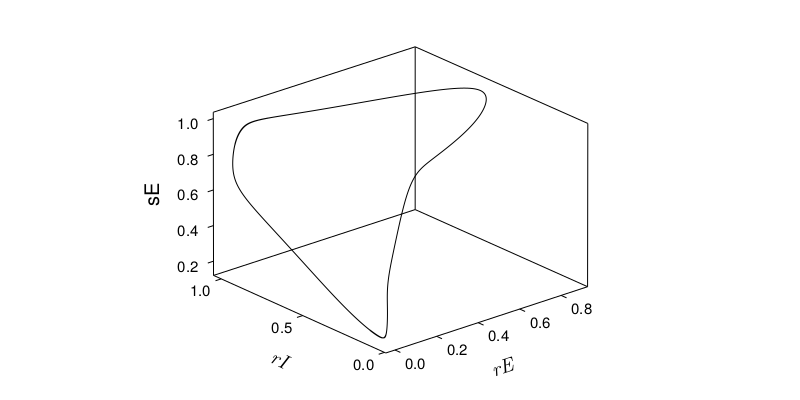

CairoMakie.Screen{IMAGE}


In [39]:
tstart, tend = 50000, 250000
tickssize = 15
labelsize = 20

CairoMakie.activate!()
f= Figure(resolution = (800, 400))
axis  = Axis3(f[1, 1], xlabel = L"rE", ylabel = L"rI", zlabel = "sE",
                xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
                xticklabelsize = tickssize, yticklabelsize = tickssize, zticklabelsize = tickssize,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(axis, traj[tstart:tend, 3], traj[tstart:tend, 4], traj[tstart:tend, 1],  linewidth = 1.0, color = :black)
display(f)